# Sparse Kernel Machines

## Lagrange Multipliers (KKT condition)
Consider that we want to find the maximum of a function $f(x_1, x_2)$ with respect to both $x_1, x_2$ subject to a constraint relating to $x_1, x_2$ which written in the form 
$$g(x_1, x_2) = 0$$

#### Approach 1
Solving the constrain and express $x_2$ as $x_2 = h(x_1)$. Then substitute into $f(x_1, x_2)$ to get $f(x_1, h(x_1))$. Solve the $x_1^*$ to maximize the function, then solve $x_2^* = h(x_1^*)$

The problem of this approach is that it may be difficult to find an analytic solution of the constraint equation. Also, this approach treats $x_1$ and $x_2$ differently and so spoils the natural symmetry between these variables.

#### A more elegant, and often simpler, approach
Lagrange multiplier:

We start from the constraint equation $g(x_1, x_2) = 0$. We introduce the third dimention with the variable, suppose as $z$. Then we have the function $z = g(x_1, x_2)$. In this three dimension space, the equation $g(x_1, x_2) = 0$ is shape (contour) on the surface of $z = 0$.

The interested thing is that no matter where we start on the contour, with any location $x_1', x_2'$, the gradient of the function $z = g(x_1, x_2)$ respect to both $x_1, x_2$ will be orthogonal to the tangent of the contour given the point $x_1', x_2'$. while the direction could be either pointing at the center or pointing outside depending on the shape of the function $z = g(x_1, x_2)$.

Stick on the three-demsion space, we then considering to maximize the objective function $f(x_1, x_2)$, which should be shaped like a mountain in the space, with the constraint $g(x_1, x_2) = 0$. At the maximum point $x_1^*, x_2^*$, the gradient of the function $f(x_1, x_2)$ should also be orthogonal to the constraint curve. Or otherwise, the point will slides on the constraint contour curve until there is no tangent vector component to the maximum solution point of $f$.

We should note that although we are in the three-dimension space, the gradients are directions of moving $x_1$ and $x_2$, which is on the surface of coordinates system $x_1, x_2$, which provides the parallel or anti-parallel vectors $\nabla f(x_1, x_2)$ and $\nabla g(x_1, x_2)$.

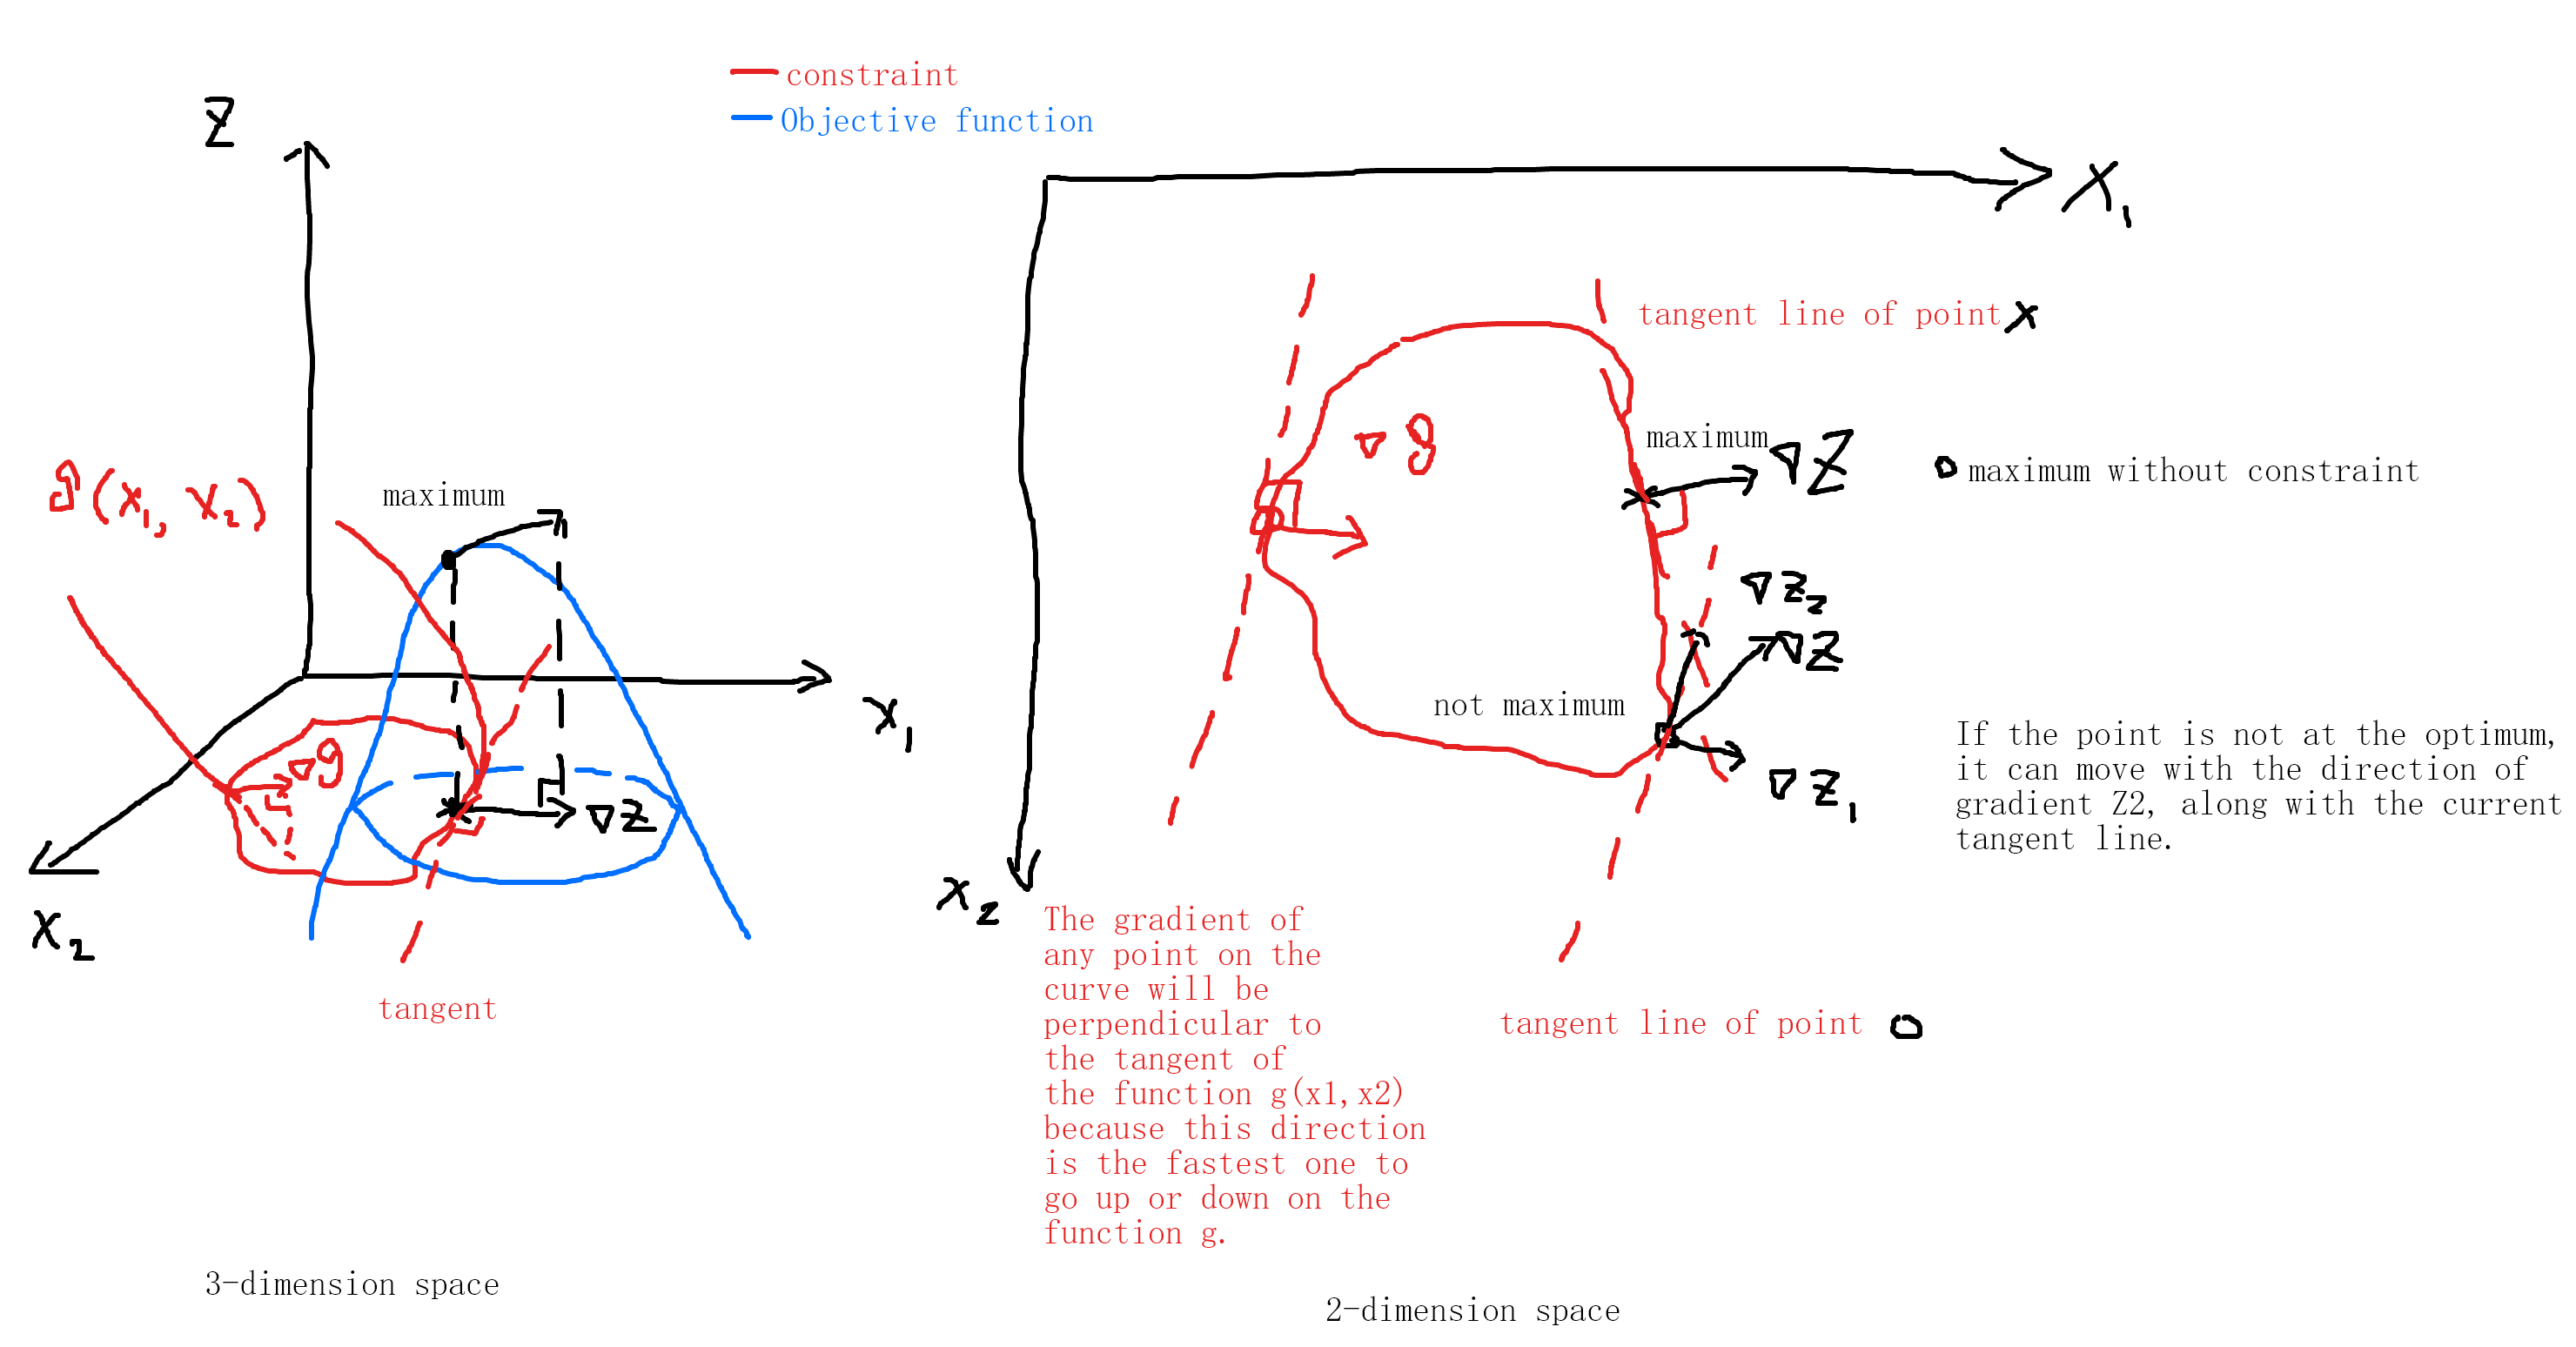

Conclusion: If the point $x_1^*, x_2^*$ maximize the function $f$ satisfying the constraint $g = 0$, $\nabla f(x_1, x_2) + \lambda \nabla g(x_1, x_2) = 0$ with some $\lambda \neq 0$. (The $\lambda$ is known as a Lagrange multiplier)

But the conclusion is a necessary condition, not a sufficient condition. The thing we really want is that once $\nabla f(x_1, x_2) + \lambda \nabla g(x_1, x_2) = 0$, the satisfying point $x_1^*, x_2^*$ must maximize the function $f$, which means local optimum is inevitable.

Another thing we may need to pay attention is the regularity of the constraints, 1) all functions, including objective function and constraints, should be continuous and first order differentiable; 2) all constraints should be linearly independent.

With a more general equation $\nabla f(x) + \lambda \nabla g(x) = 0$ for a vector $x$, the Lagrangian function could be defined by
$$L(x, \lambda) \equiv f(x) + \lambda g(x)$$
in which the optimum could be observed with $\nabla_x L = 0$ with the condition $\partial L / \partial \lambda = 0$ which leads to $g(x) = 0$. 

Thus, to find the maximum of a function $f(x)$ subject to the constraint $g(x) = 0$, the Lagrangian function $L(\lambda, x)$ is defined, and the stationary point of $L$ could be found with respect to both $x$ and $\lambda$.

#### For Inequality constraints
The problem now is to maximize the function $f(x)$ subject to $g(x) \geq 0$. 
There are two kinds of solution possible, and usually, the method is to try them one by one.

1. The constrained stationary point lies in the region where $g(x) > 0$, in which case the constraint is inactive. The function $g(x)$ plays no role and so the stationary condition is simply $\nabla f(x) = 0$. This one is corresponding to the Lagrange function $L(x, \lambda)$ with $\lambda = 0$.
2. If the stationary point lies on the boundary, it goes back to the equality term, which also corresponds to $L$ with $\lambda \neq 0$.

But in this case the sign of the Lagrange multiplier is crucial, because the function $f(x)$ will only be at a maximum if its gradient is oriented away from the region $g(x) > 0$, $\nabla f(x) = -\lambda \nabla g(x)$ for some value of $\lambda > 0$.

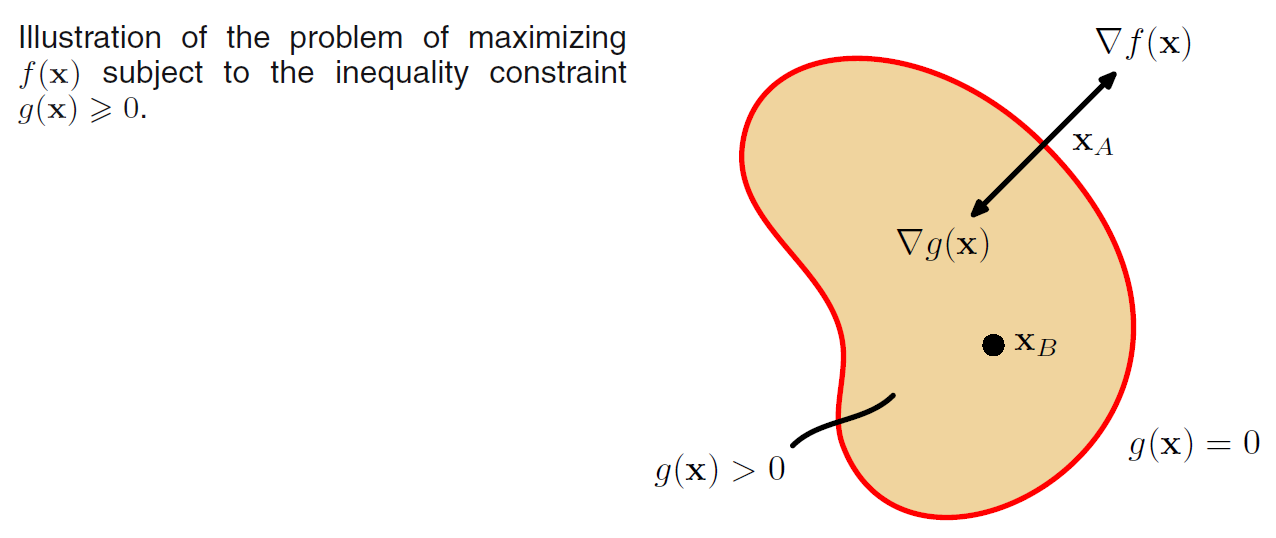

For either of these two cases, the product $\lambda g(x) = 0$. Thus the solution to the poblem of maximizing $f(x)$ subject to $g(x) \geq 0$ is obtained by optimizing the Lagrange function with respect to $x$ and $\lambda$ subject to the conditions
$$g(x) \geq 0$$
$$\lambda \geq 0$$
$$\lambda g(x) = 0$$

These are known as the KKT conditions.

## The application of transforming original optimization problem to its dual problem

## Maximum Margin Classifiers
The basic function for supervised learning
$$y(x) = \boldsymbol{w}^T\phi(x) + b$$
But for two-class classification problem, where the target variable $t_n \in \{-1, 1\}$, the classification model only uses the sign. 
$sign(y(x)) = 1 \text{ if } y(x) > 0$ and $sign(y(x)) = -1 \text{ if } y(x) < 0$

#### Problem: Choose the margine $y(x)$ for classification

### Support Vector Machine
Target: find the dicision boundary $y(x)$ to maximize the margin of two classes.

Motivation:
Tong and Koller (2000) showed that maximizing the margin could be motivated using the idea of minimizing the probability of misclassification with given distributions of the two classes, in other words, minimizing the prediction error rate.

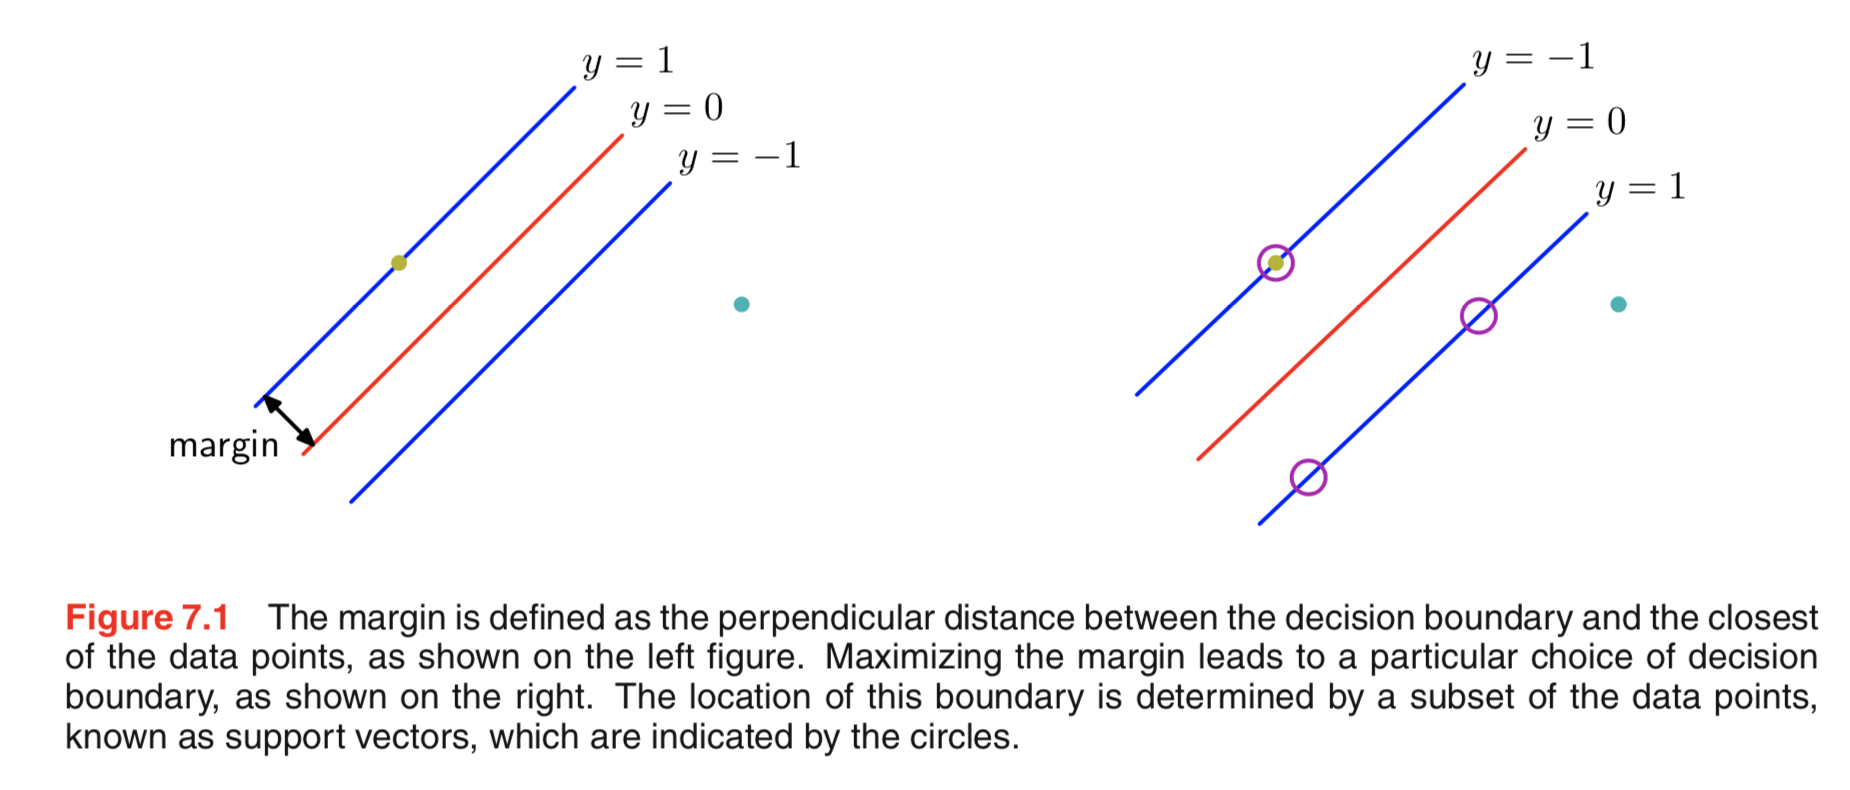

As shown in the figure above, the margin is defined as the distance from cloest point to the boundary, so the problem actually is to find the decision boundary $y(x)$ in which the cloest points have the maximum margin (distance).
#### Back to Chapter 4, to calculate the distance from observing point in its feature space to the boundary.

On the boundary: $y(x) = 0$; for classification the distance is
$$\frac{t_ny(x_n)}{||\boldsymbol{w}||} = \frac{t_n(\boldsymbol{w}^T\phi(x_n)+b)}{||\boldsymbol{w}||}$$

The conditions used to find the margin are 1) decide which points are closest to the margin (minimization), 2) decide the margin which makes the distance to the selected points in 1) to be as far as possible (maximization). So the function is represented as a min-max problem:
$$arg \, max_{\boldsymbol{w},b}\{\frac{1}{||\boldsymbol{w}||}min_n[t_n(\boldsymbol{w}^T\phi(x_n)+b)]\}$$

Because the objective function is a ratio in which both numerator and denominator contain the term $||\boldsymbol{w}||$, the ratio could be consistent once we multiplying some value to $\boldsymbol{w}$. With this property, we can rescale the unscaled maximum distance between the cloest points to the margin as 
$$t_n(\boldsymbol{w}^T\phi(x_n)+b) = 1$$

so that for all points, $$t_n(\boldsymbol{w}^T\phi(x_n)+b) \geq 1, n = 1, \dots, N$$

Then all points could be devided into two groups: active points ($t_n(\boldsymbol{w}^T\phi(x_n)+b) = 1$), inactive points ($t_n(\boldsymbol{w}^T\phi(x_n)+b) > 1$).

Suppose the boundary can perfectly divide the two groups in the feature space, if we want to decide the optimum boundary, there must exist at least two active points (each in one class), which means, in simplest circumstance, $min_n[t_n(\boldsymbol{w}^T\phi(x_n)+b)]$ equals to 2 or other constant $C > 2$. So the min-max problem becomes 
$$arg \, max_{\boldsymbol{w},b}\{\frac{1}{||\boldsymbol{w}||} C\}$$
which is equivalent to 
$$arg \, min_{\boldsymbol{w},b}\frac{1}{2}||\boldsymbol{w}||^2$$
$$\text{s.t. } t_n(\boldsymbol{w}^T\phi(x_n)+b) \geq 1 \text{ , } n = 1, \dots, N$$

With the KKT condition, $g(\boldsymbol{w}) = t_n(\boldsymbol{w}^T\phi(x_n)+b) -1 \geq 0$, denote the Lagrange multipliers $\boldsymbol{a} = (a_1, \dots, a_N)^T \geq \boldsymbol{0}$, then the Lagrangian function could be written as 
$$L(\boldsymbol{w}, b, \boldsymbol{a}) = \frac{1}{2}||\boldsymbol{w}||^2 - \sum_{n=1}^Na_n\{t_n(\boldsymbol{w}^T\phi(x_n)+b)-1\}$$
$\text{s.t. }$
$$  t_n(\boldsymbol{w}^T\phi(x_n)+b) -1 \geq 0, n = 1, \dots, N$$
$$\boldsymbol{a} \geq \boldsymbol{0} $$
$$a_n\{t_n(\boldsymbol{w}^T\phi(x_n)+b)-1\} = 0, n = 1, \dots, N$$

There should be no calculation difference in the process of finding the maximum and the minimum, once the real optimum point of the function $f(x)$ without constraints is out of the constrained region so that the constrained solution should be on the boundary ($g(x) = 0$). In other words, the directions of $\nabla f$ and $\nabla g$ should always be anti-parallel, which means the Lagrange multiplier $\lambda$ should always negative.

Since we should minimizing the Lagranian funciton $L$ with respect to $\boldsymbol{w}, b, \lambda = -\boldsymbol{a}$, which is equvalent to minimizing $L$ with respect to $\boldsymbol{w}, b$ and maximizing $L$ with respect to $\boldsymbol{a}$.


#### If we only have one observation $x$, the solutions will be considered with the following statements:

Solution 1: if the optimum in the region of $g(x) > 0$, we only need to solve $min \frac{1}{2}||\boldsymbol{w}||^2$, which leads to $\boldsymbol{w} = \boldsymbol{0}$ and the predicted values should always be 0. This solution indicating that the model does not provide an effective way to classify the observations.

Solution 2: the optimum on the boundary $g(x) = 0$, then we shall have
$\partial L/\partial \boldsymbol{w} = 0$, $\partial L / \partial b = 0$, and $\partial L / \partial \boldsymbol{a} = 0$

#### But for a more complicated circumstance that we have $n$ observations, the optimum should be considered that in some of the regions but on some of the boundaries, which means, $a_n = 0$ for some $n$s and $t_n(\boldsymbol{w}^T\phi(x_n) + b) - 1 = 0$ for some other $n$s.

In the solution, the Lagrange multipliers $a_n$s actually play very important roles which are just like switches to control which observations are active. In the above problem, we can tansform it into a dual problem only related to $\boldsymbol{a}$ by first solving the minimization problem with respect to $\boldsymbol{w}$ and $b$, just like what we do in the $\textbf{Approach 1}$ at the very beginning we have mentioned, the substitution.

With the partial derivatives of $L$ with respect to $\boldsymbol{w}$ and $b$,
$$\boldsymbol{w} - \sum_{n=1}^N a_n t_n \phi(x_n) = 0$$
$$\sum_{n=1}^N a_nt_n = 0 $$

Take the above results back to the Lagrangian function $L$, now our target becomes to find the $\boldsymbol{a}$ that maximize 
$$\tilde{L}(\boldsymbol{a}) = \frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n t_n \phi(x_n)^T a_m t_m \phi(x_m) - \sum_{n=1}^N a_n t_n [\sum_{m=1}^Na_m t_m\phi(x_m)^T]\phi(x_n) + \sum_{n=1}^Na_n t_n b + \sum_{n=1}^Na_n$$
(dual problem)

$\text{s.t. }$
$$\sum_{n=1}^N a_nt_n = 0 $$
$$a_n \geq 0, n = 1, \dots, N$$

With the constraint $\sum_{n=1}^N a_nt_n = 0 $, the term $\sum_{n=1}^Na_n t_n b = 0$. Also, since $\phi(x_n)^T \phi(x_m) = k(x_n, x_m)$ is the kernel trick we want to use to solve the model, the dual Lagrangian function is 
$$\tilde{L}(a) = \frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n t_n a_m t_m k(x_n, x_m) - \sum_{n=1}^N \sum_{m=1}^N a_n t_n a_m t_m k(x_m, x_n) + \sum_{n=1}^Na_n$$
$$ = -\frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n t_n a_m t_m k(x_n, x_m) + \sum_{n=1}^Na_n$$
$\text{s.t. }$
$$\sum_{n=1}^N a_nt_n = 0 $$
$$a_n \geq 0, n = 1, \dots, N$$

Question, from solving $arg \, min_{\boldsymbol{w},b}\frac{1}{2}||\boldsymbol{w}||^2$ to solving $arg \, max_{\boldsymbol{a}}\tilde{L}$, the computational comlexity increases or decreases?



The solution to a quadratic programming problem in $M$ variables in general has
computational complexity that is $O(M^3)$. Denotes the original otimization problem in solving $\boldsymbol{w}$ related to $M$ variables, the dual problem related to $N$ observations. In general cases, $N >> M$. So the dual problem does not decrease the computational complexity.

We may need to think more about the computational complexity.

The advantage of the method: 1) it would be convenient and effective once the feature space $\phi(x)$ is highly dimensional (even for infinite-dimension feature space); 2) the constraint of positive definite of kernel function ensures the Lagrangian function is bounded below, giving rise to a well-defined optimization problem. ($\sum_{n=1}^N \sum_{m=1}^N a_n t_n a_m t_m k(x_n, x_m) = \boldsymbol{at^TKat}$, in which $\boldsymbol{at} = (a_1t_1, \dots, a_Nt_N)^T$ and $\boldsymbol{K}$ is the $n \times n$ kernel matrix of $k(x_n, x_m)$)

### Sequential Minimal Optimization (SMO)

Now we need to consider solve the optimization problem. 

#### Coordinate Ascent

Suppose we want to find the solution for $arg \, max _{\boldsymbol{a}}F(a_1, \dots, a_N)$, at every time, we do the partial derivative with respect to one variable $a_n$ while fix all the rest, and then update $a_n$ with its gradient, until convergence. 

#### 
For SVM, the SMO is similar to coordinate ascent, but because we need to consider the constraints, the update process is more complex.

We first consider the constraint
$$\sum_{n=1}^N a_nt_n = 0, $$
the updating process at each time should consider a pair of $a_i, a_j$ to ensure the constraint.

At each time, fix all the rest term as $C$ except terms related to $a_i, a_j$, the objective function becomes 
 $$-\frac{1}{2} a_i t_i \sum_{n = 1}^N a_n t_n k(x_n, x_i) -\frac{1}{2}a_j t_j \sum_{m =  1}^N a_m t_m  k(x_m, x_j) + a_i + a_j +C$$
 $$ = -\frac{1}{2} a_i^2 t_i^2 k(x_i, x_i)  -\frac{1}{2}a_j^2 t_j^2 k(x_j, x_j) -a_it_ia_jt_jk(x_i, x_j)  -\frac{1}{2} a_i t_i \sum_{n \neq i,j} a_n t_n k(x_n, x_i) $$$$ -\frac{1}{2}a_j t_j \sum_{m \neq i,j}^N a_m t_m  k(x_m, x_j) + a_i + a_j +C$$
 
 We can denote this new objective funciton of $a_i, a_j$ as $F(a_i, a_j)$, and the new constraint is 
 $a_it_i + a_jt_j = -\sum_{n \neq i,j}a_n t_n = \xi$
 
 Again, back to the simplest optimization method, the substitution, $a_i = \xi t_i - a_jt_it_j = f(a_j)$ since $t_i t_i = 1$ for all $i$.
 Then the loss function becomes $F(f(a_j), a_j)$, with the derivative equals to 0 with respect to $a_j$
 we can get $$-\eta a_j^{new} + \eta a_j^{old} + t_j(E_i - E_j) = 0$$
 in which $\eta = k(x_i, x_i) + k(x_j, x_j) - 2k(x_i, x_j)$ and $E_i = y(x_i) - t_i$
 so that $a_j^{new} = a_j^{old} + \frac{t_j(E_i - E_j)}{\eta}$
 
 But we also need to pay attention to the other constraint that $a_n \geq 0$ for all $n$, 
 for $a_j$, $a_it_i + a_jt_j= \xi$ and $a_i, a_j \geq 0$. 
 
 Then since $t_i, t_j$ can equal to 1 or -1, the constraints become $0 \leq a_j \leq \xi $ for $t_i, t_j = 1$, or $a_j \geq 0 \& a_j \geq -\xi$ for $t_i = 1, t_j = -1$, or $0 \leq a_j \leq \xi$ for $t_i = -1, t_j = 1$, or $a_j \geq 0 \& a_j \geq \xi$ for $t_i, t_j = -1$
 
 We can see with different output combination, the constraints are different, so in general, we just denotes the upper bound as $H$ and the lower bound as $L$ so that the update of 
 $a_j^{real, new} = H$ if $a_j^{new} > H$, or $a_j^{real, new} = a_j^{new}$ if $L \leq a_j^{new} \leq H$, or $a_j^{real, new} = L$ if $a_j^{new} < L$
 
 Then we can use $a_j^{real,new}$ to get $a_i^{real,new} = a_i^{old} + t_it_j(a_j^{old} - a_j^{real,new})$
 
 After that we can update $b$ with
 If $a_i$ is not on the upper or lower bounds, $b_i^{new} = t_i - \sum_{n \neq i,j}a_nt_nk(x_n, x_i) - a_i^{real,new}t_ik(x_i, x_i) - a_j^{real,new}t_jk(x_j, x_i)$.
 
 Similarly, we can find $b_j^{new}$ if $a_j$ is not on the bounds. 
 If both $a_i, a_j$ are not on the bounds, then $b_i^{new} = b_j^{new}$, otherwise, $b^{new} = \frac{b_i^{new} + b_j^{new}}{2}$

Reference: https://zhuanlan.zhihu.com/p/29212107

### For the prediction or the boundary function for classification $y(x)$

$$y(x) = \boldsymbol{w}^T\phi{x} +b = \sum_{n=1}^Na_n t_n \phi(x_n)^T \phi(x) +b = \sum_{n=1}^Na_n t_n k(x_n, x) +b$$

Rewrite the KKT conditions of $L(\boldsymbol{w}, b, \boldsymbol{a})$ with $\boldsymbol{w}^T\phi{x_n} +b = y(x_n)$

$$  t_ny(x_n) -1 \geq 0, n = 1, \dots, N$$
$$\boldsymbol{a} \geq \boldsymbol{0} $$
$$a_n\{t_ny(x_n)-1\} = 0, n = 1, \dots, N$$

we can see it clearer that for some $n$s that $a_n > 0$ and $t_ny(x_n)-1 = 0$, the observations are active. These active data points are called $\textit{support vectors}$. And because they satisfy $t_ny(x_n)=1$, the data points lies on the marginal surfaces from the classification boundary

### Overlapping class distribution

We accept some mistakes by introducing $\textit{slack variables}$, $\xi_n \geq 0$.

For all points, the constrainte become $$t_n y(x_n) \geq 1 - \xi_n$$

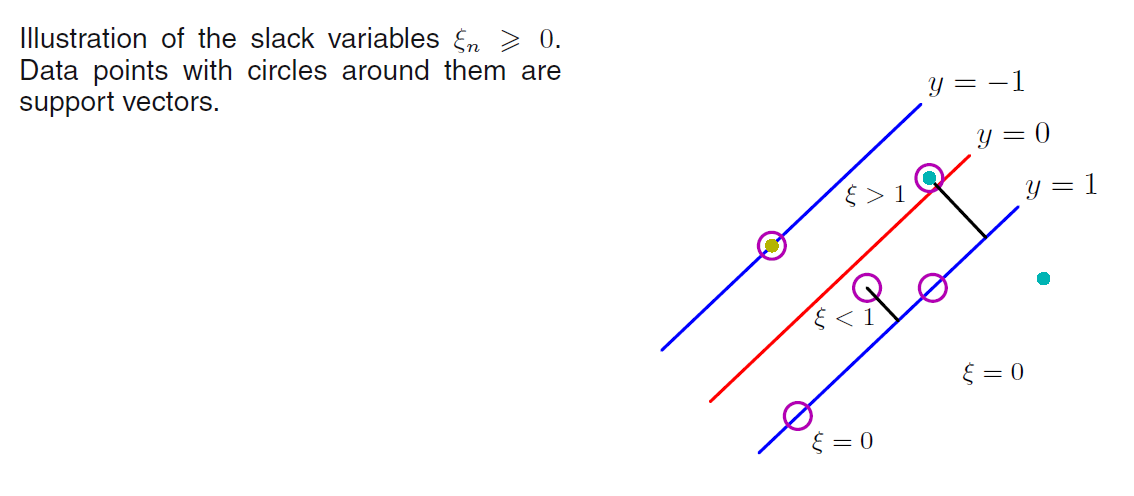

Similar to the above objective function construction process, 
the original objective function is $$max_{b,w}\{\frac{1}{||w||}min_{n}[t_ny(x_n) + \xi_n]\}$$
and this one can transform, when we treat $t_ny(x_n)$ as constant, to 
$$\frac{1}{2}||\boldsymbol{w}||^2 + C \sum_{n=1}^N \xi_n$$ where the parameter $C > 0$ controls the trade-off between the slack vairbale pentalty and the margin.


Then the Lagrangian function we want to minimize with respect to $\mathbf{w}, b, \xi_n$ and maximize with $\mathbf{a}$ is 
$$
L(\mathbf{w}, b, \mathbf{a})=\frac{1}{2}\|\mathbf{w}\|^2+C \sum_{n=1}^N \xi_n-\sum_{n=1}^N a_n\left\{t_n y\left(\mathbf{x}_n\right)-1+\xi_n\right\}-\sum_{n=1}^N \mu_n \xi_n
$$
 with KKT dontidions
 $$
\begin{aligned}
a_n & \geqslant 0 \\
t_n y\left(\mathbf{x}_n\right)-1+\xi_n & \geqslant 0 \\
a_n\left(t_n y\left(\mathbf{x}_n\right)-1+\xi_n\right) & =0 \\
\mu_n & \geqslant 0 \\
\xi_n & \geqslant 0 \\
\mu_n \xi_n & =0
\end{aligned}
$$

And again, by replacing $\mathbf{w}, b, \xi_n$ with $\mathbf{a}$, the dual problem is
$$
\widetilde{L}(\mathbf{a})=\sum_{n=1}^N a_n-\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n a_m t_n t_m k\left(\mathbf{x}_n, \mathbf{x}_m\right)
$$
$\text{s.t. }$
$$
\begin{gathered}
0 \leqslant a_n \leqslant C \\
\sum_{n=1}^N a_n t_n=0
\end{gathered}
$$

The optimization problem can also be solved with SMO, just need to change the upper bound of $a_i, a_j$ by considering the arbitraty parameter $C$.

### Comparison to logistic regression

If we change the target variable of the logistic regression from $t \in \{0,1\}$ to $t \in \{-1,1\}$, then rewrite the conditional distribution function $p(t = 1 | y(x_n)) = \sigma(y(x_n))$ and $p(t = -1 | y(x_n)) = 1- \sigma(y(x_n)) = \sigma(-y(x_n))$ with combination, $p(t|y) = \sigma(ty)$, and finally we can use the negative log likelihood function with quadratic regularization term as the objective funciton
$$\sum_{n=1}^NE_{LR}(y(x_n)t_n) + \lambda ||\mathbf{w}||^2$$
where $E_{LR}(y(x_n)t_n) = log(1 + exp(-y(x_n)t_n))$

With reasonable transformation of the SVM loss function, 
$$\sum_{n=1}^NE_{SV}(y(x_n)t_n) + \lambda ||\mathbf{w}||^2$$
where $\lambda = (2C)^{-1}$ and $E_{SV}(y(x_n)t_n) = [1 - y(x_n)t_n]_+ = max(0, 1 - y(x_n)t_n)$

### SVM for regression

The decision of loss funciton

The loss function is not not the sum squared error, but $\epsilon$-insensitive error function.
$$
E_\epsilon(y(\mathbf{x})-t)= \begin{cases}0, & \text { if }|y(\mathbf{x})-t|<\epsilon \\ |y(\mathbf{x})-t|-\epsilon, & \text { otherwise }\end{cases}
$$
Then the objective function would be minimizing
$$C\sum_{n=1}^N E_\epsilon(y(x_n) - t_n) + \frac{1}{2}||\mathbf{w}||^2$$

We also need to consider the slack variable, but now we need two to ensure the elacsticity
$$t_n \leq y(x_n) + \epsilon  + \xi_n$$
$$t_n \geq y(x_n) - \epsilon - \hat{\xi}_n$$

So the objective function becomes
$$C\sum_{n=1}^N E_\epsilon(\xi_n + \hat{\xi}_n) + \frac{1}{2}||\mathbf{w}||^2$$

with constraints $\xi_n \geq 0$ $\hat{\xi}_n \geq 0$, $t_n \leq y(x_n) + \epsilon  + \xi_n$
$t_n \geq y(x_n) - \epsilon - \hat{\xi}_n$,

the corresponding Lagrangian function to optimize (minimize with parameter and maximize with Lagrange multipliers) is

$$
\begin{aligned}
L= & C \sum_{n=1}^N\left(\xi_n+\widehat{\xi}_n\right)+\frac{1}{2}\|\mathbf{w}\|^2-\sum_{n=1}^N\left(\mu_n \xi_n+\widehat{\mu}_n \widehat{\xi}_n\right) \\
& -\sum_{n=1}^N a_n\left(\epsilon+\xi_n+y_n-t_n\right)-\sum_{n=1}^N \widehat{a}_n\left(\epsilon+\widehat{\xi}_n-y_n+t_n\right) .
\end{aligned}
$$

$\text{s.t. }$
$$a_n \geq 0$$
$$\hat{a}_n \geq 0$$
$$\mu_n \geq 0$$
$$\hat{\mu}_n \geq 0$$

Again, set the derivarives of $L$ with respect to $\mathbf{w}, b, \xi_n, \hat{\xi}_n$ to zero, the dual problem is

$$
\begin{aligned}
\widetilde{L}(\mathbf{a}, \widehat{\mathbf{a}})= & -\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N\left(a_n-\widehat{a}_n\right)\left(a_m-\widehat{a}_m\right) k\left(\mathbf{x}_n, \mathbf{x}_m\right) \\
& -\epsilon \sum_{n=1}^N\left(a_n+\widehat{a}_n\right)+\sum_{n=1}^N\left(a_n-\widehat{a}_n\right) t_n
\end{aligned}
$$

The bounds for $a_n$ and $\hat{a}_n$ are $0 \leq a_n \leq C$ and $0 \leq \hat{a}_n \leq C$.
And the KKT conditions are 
$$
\begin{aligned}
a_n\left(\epsilon+\xi_n+y_n-t_n\right) & =0 \\
\widehat{a}_n\left(\epsilon+\widehat{\xi}_n-y_n+t_n\right) & =0 \\
\left(C-a_n\right) \xi_n & =0 \\
\left(C-\widehat{a}_n\right) \widehat{\xi}_n & =0 .
\end{aligned}
$$


There is an alternative formulation of the SVM regression,
$$
\begin{aligned}
\widetilde{L}(\mathbf{a}, \widehat{\mathbf{a}})= & -\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N\left(a_n-\widehat{a}_n\right)\left(a_m-\widehat{a}_m\right) k\left(\mathbf{x}_n, \mathbf{x}_m\right) \\
& +\sum_{n=1}^N\left(a_n-\widehat{a}_n\right) t_n
\end{aligned}
$$
subject to the constraints
$$
\begin{aligned}
& 0 \leqslant a_n \leqslant C / N \\
& 0 \leqslant \widehat{a}_n \leqslant C / N \\
& \sum_{n=1}^N\left(a_n-\widehat{a}_n\right)=0 \\
& \sum_{n=1}^N\left(a_n+\widehat{a}_n\right) \leqslant \nu C .
\end{aligned}
$$

instead of fixing the width $\epsilon$ of
the insensitive region, we fix instead a parameter $\nu$ that bounds the fraction of points
lying outside the tube.

## Relevance Vector Machines
### RVM for regression

Suppose the probability model is
$$p(t | x, w, \beta) = N(t | y(x), \beta^{-1})$$

For RVM, the general expression of the model is mirror the structure of ther SVM as
$$y(x) = \sum_{n=1}^Nw_nk(x, x_n) + b$$

Then with classic Bayesian deduction, the likelihood function is

$$p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^N p(t_n | x_n, \mathbf{w}, \beta^{-1})$$

With a conjugate prior distribution of $\mathbf{w}$

$$p(\mathbf{w} | \mathbf{\alpha}) = \prod_{i=1}^MN(w_i | 0, \alpha_i^{-1})$$

#### The key difference in the RVM is that we introduce a separate hyperparameter $\alpha_i$ for each of the weight parameters $w_i$ instead of a single shared hyperparameter.

So the posterior distribution of the parameters is
$$p(\mathbf{w}|\mathbf{t}, \mathbf{X}, \mathbf{\alpha}, \beta) = N(\mathbf{w}|\mathbf{m}, \mathbf{\Sigma})$$
where
$$\mathbf{m} = \beta \mathbf{\Sigma}\mathbf{\Phi}^T\mathbf{t}$$
$$\mathbf{\Sigma} = (\mathbf{A} + \beta \mathbf{\Phi}^T\mathbf{\Phi})^{-1}$$ where $\mathbf{A} = diag(\alpha_i)$ and in this case, $\mathbf{\Phi}$ is the $(N+1) \times (N+1)$ symmetric kernel matrix $\mathbf{K}$ according to the model $y(x) = \sum_{n=1}^Nw_nk(x, x_n) + b$

The value of $\mathbf{\alpha}$ and $\beta$ could be estiamted with type-2 maximum likelihood, also known as the $\textit{evidence approximation}$. First, find the marginal likelihood function by integration
$$p(\mathbf{t}|\mathbf{X}, \mathbf{\alpha}, \beta) = \int p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) p(\mathbf{w} | \mathbf{\alpha})d\mathbf{w}$$

the log marginal likelihood function is
$$
\begin{aligned}
\ln p(\mathbf{t} \mid \mathbf{X}, \boldsymbol{\alpha}, \beta) & =\ln \mathcal{N}(\mathbf{t} \mid \mathbf{0}, \mathbf{C}) \\
& =-\frac{1}{2}\left\{N \ln (2 \pi)+\ln |\mathbf{C}|+\mathbf{t}^{\mathrm{T}} \mathbf{C}^{-1} \mathbf{t}\right\}
\end{aligned}
$$
in which $$\mathbf{C} = \beta^{-1}\mathbf{I} + \mathbf{\Phi A^{-1} \Phi^T}$$

Maximizing the log marginal likelihood function by seting the first derivatives with respect to $\alpha$ and $\beta^{-1}$ gives us
 
 $$
\begin{aligned}
\alpha_i^{\text {new }} & =\frac{\gamma_i}{m_i^2} \\
\left(\beta^{\text {new }}\right)^{-1} & =\frac{\|\mathbf{t}-\mathbf{\Phi m}\|^2}{N-\sum_i \gamma_i}
\end{aligned}
$$
where$m_i$ is the $i$th component of the posterior mean $\mathbf{m}$ defined by $\mathbf{m} = \beta \mathbf{\Sigma}\mathbf{\Phi}^T\mathbf{t}$, $\gamma_i = 1 - \alpha_i \Sigma_{ii}$ and $\Sigma_{ii}$ is the $i$th diagonal component of the posterior covariance matrix.

With initial values of $\mathbf{\alpha}$ and $\beta$, we can estimate the posterior mean and covairance, then update $\mathbf{\alpha}$ and $\beta$, until convergence.

EM algorithm can also done this work, but the convergence rate with the algorithm above is faster (Tipping, 2001).

### How RVM becomes sparse?
With the above extimation, we can find that a proportion of the hyperparameters $\{\alpha_i\}$ are driven to large (in pinciple infinite) values, and so the weight parameters $w_i$ corresponding to these hyperparameters have posterior distributions with mean and variance both zero. 

So the corresponding basis functions $\phi_i(x)$ are removed from the model and play no role in making predictions for new inputs. In the model $y(x) = \sum_{n=1}^Nw_nk(x, x_n) + b$, the inputs $x_n$ corresponding to the remaining nonzero weights are called $\textit{relevance vectors}$.

The predction distribution over $t$ for a new input $x$ is given by
$$p(t | x, \mathbf{X}, \mathbf{t}, \mathbf{\alpha}^*, \beta^*) = \int p(t | x, \mathbf{w}, \beta^*)p(\mathbf{w}|\mathbf{X}, \mathbf{t}, \mathbf{\alpha}^*, \beta^*)d\mathbf{w}$$
$$ = N(t|\mathbf{m}^T\phi(x), \sigma^2(x))$$

in which $\mathbf{m}$ is the posterior mean of $\mathbf{w}$, and $\sigma^2(x) = (\beta^*)^{-1} + \phi(x)^T\Sigma^*\phi(x)$, and $\mathbf{\Sigma}^* = (\mathbf{A}^* + \beta^* \mathbf{\Phi}^T\mathbf{\Phi})^{-1}$

The principal disadvantage of the RVM compared to the SVM is that training
involves optimizing a nonconvex function, and training times can be longer than for a
comparable SVM. For a model with $M$ basis functions, the RVM requires inversion
of a matrix of size $M \times M$, which in general requires $O(M^3)$ computation.

### Analysis of sparsity

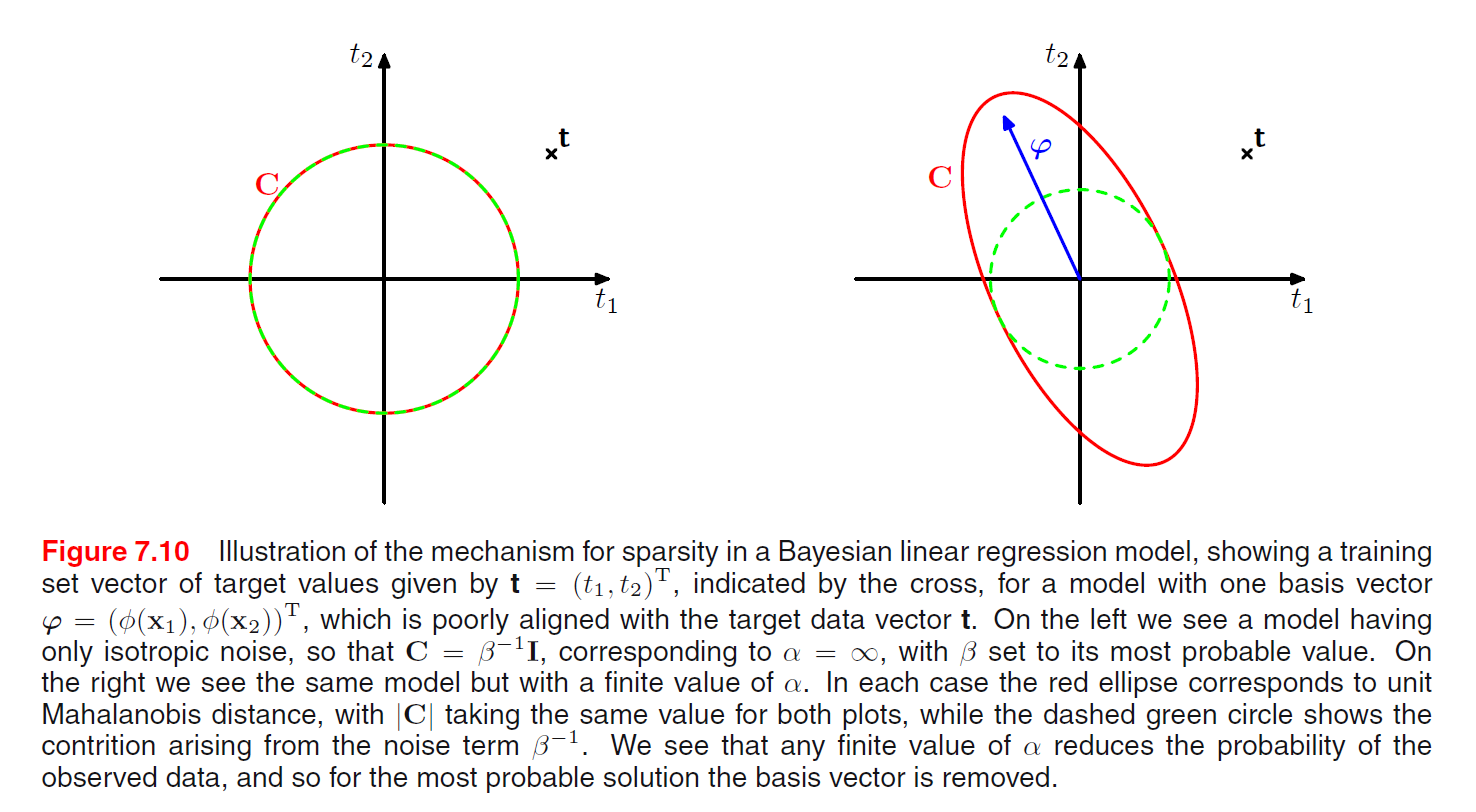